In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from mvpa2.suite import *

/home/ijaju/.local/lib/python3.5/site-packages/nibabel/testing/__init__.py:21: DeprecationWarning: Importing from numpy.testing.decorators is deprecated, import from numpy.testing instead.
  from numpy.testing.decorators import skipif
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/ijaju/.local/lib/python3.5/site-packages/mvpa2/datasets/sources/skl_data.py:32: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  argnames, varargs, varkw, defaults = inspect.getargspec(fx)


In [2]:
df = pd.read_csv("../../datasets/CollegeScorecard.csv")
df.tail()

/home/ijaju/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7803,48285707,157103,1571,Georgia Military College-Stone Mountain,Stone Mountain,GA,30083,NaN,http://fairburn.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


### Some Preprocessing

In [4]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

AccredAgency                   2052
INSTURL                          85
NPCURL                          591
sch_deg                        7804
LOCALE                          424
locale2                        7804
LATITUDE                        785
LONGITUDE                       785
CCBASIC                        3449
CCUGPROF                       4245
CCSIZSET                       4228
HBCU                            421
PBI                             421
ANNHI                           421
TRIBAL                          421
AANAPII                         421
HSI                             421
NANTI                           421
MENONLY                         421
WOMENONLY                       421
RELAFFIL                       6887
ADM_RATE                       5584
ADM_RATE_ALL                   5320
SATVR25                        6503
SATVR75                        6503
SATMT25                        6489
SATMT75                        6489
SATWR25                     

#### Removing columns with null values >= 3500

In [5]:
remove_cols = []
for i in null_columns:
    if df[i].isnull().sum() >= 3500:
        remove_cols.append(i)

In [6]:
len(remove_cols)

1267

In [7]:
df.drop(labels=remove_cols,axis=1,inplace=True)

In [8]:
df.shape

(7804, 458)

#### Removing all null values and text values

In [9]:
df = df.dropna(axis=0,how="any")
df.shape

(1319, 458)

In [10]:
obj_cols=[]
for i in range(len(df.dtypes)):
    if df.dtypes[i] == 'object':
        obj_cols.append(df.columns[i])
df.drop(labels=obj_cols,axis=1,inplace=True)
df.shape

(1319, 284)

#### Elbow Plot for number of clusters
with K-Means

In [11]:
X = df.values

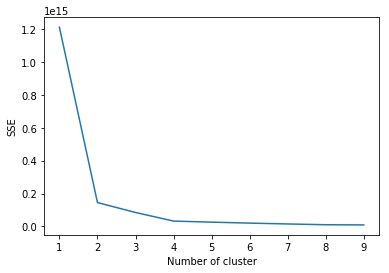

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    #X["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [13]:
#df.to_csv('Hierarchical-Clustering/cs.csv',index=False,sep=',')

In [14]:
#df = df.iloc[:,2:]
#df.reset_index(drop=True,inplace=True)

In [15]:
#df.set_index()

No of suitable clusters = 4

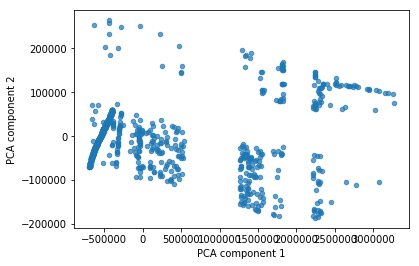

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df)
T = pd.DataFrame(T)

# plot the data
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7)
plt.show()

### Applying the K-Means Algorithm

###### 4 clusters

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y = kmeans.labels_
y

array([3, 0, 0, ..., 3, 3, 3], dtype=int32)

In [19]:
label_color = []
for i in y:
    if i==0:
        label_color.append('red')
    elif i==1:
        label_color.append('blue')
    elif i==2:
        label_color.append('green')
    else:
        label_color.append('yellow')

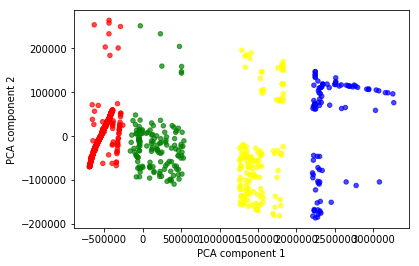

In [20]:
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',alpha=0.7,color=label_color)

###### 6 clusters

In [21]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
y = kmeans.labels_

In [22]:
label_color = []
for i in y:
    if i==0:
        label_color.append('red')
    elif i==1:
        label_color.append('blue')
    elif i==2:
        label_color.append('green')
    elif i==3:
        label_color.append('yellow')
    elif i==4:
        label_color.append('pink')
    else:
        label_color.append('black')

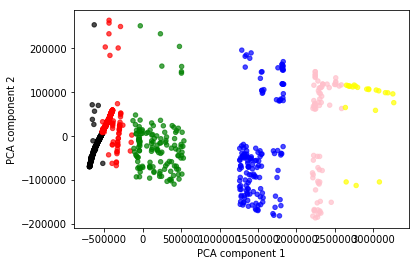

In [23]:
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',alpha=0.7,color=label_color)

This method does not seem to cluster the results very well in the case of 6 clusters

### AGNES

##### 4 clusters

In [29]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 4).fit(X)
y = clustering.labels_

In [25]:
label_color = []
for i in y:
    if i==0:
        label_color.append('red')
    elif i==1:
        label_color.append('blue')
    elif i==2:
        label_color.append('green')
    elif i==3:
        label_color.append('yellow')

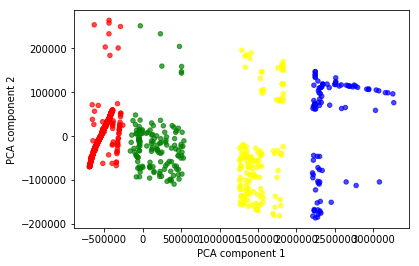

In [26]:
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',alpha=0.7,color=label_color)

The results are the same as K-Means, which means that both are efficient

##### 6 clusters

In [27]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters = 6).fit(X)
y = clustering.labels_

In [42]:
label_color = []
for i in y:
    if i==0:
        label_color.append('red')
    elif i==1:
        label_color.append('blue')
    elif i==2:
        label_color.append('green')
    elif i==3:
        label_color.append('yellow')
    elif i==4:
        label_color.append('pink')
    else:
        label_color.append('black')

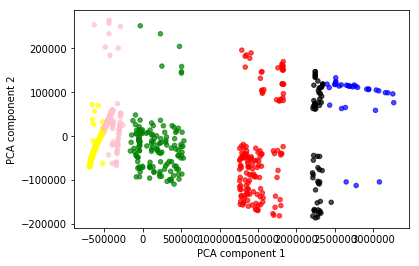

In [43]:
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',alpha=0.7,color=label_color)

With 6 clusters, the results are the same as with K-Means

### SOM

In [37]:
som = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)

In [38]:
som.train(X)

In [39]:
color_names = \
        ['black', 'blue', 'darkblue', 'skyblue']

TypeError: Invalid dimensions for image data

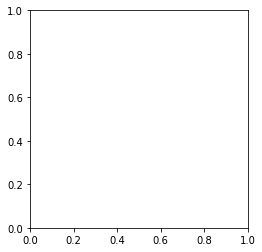

In [40]:
plt.imshow(som.K, origin='lower')

In [41]:
pca3 = PCA(n_components=3)
pca3.fit(df)
T3 = pca3.transform(df)
T3 = pd.DataFrame(T3)

In [42]:
somt = SimpleSOMMapper((20, 30), 400, learning_rate=0.05)
somt.train(T3.values)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


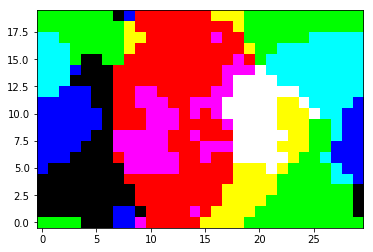

In [43]:
plt.imshow(somt.K, origin='lower')

In [78]:
somt.K.shape

(20, 30, 3)

In [79]:
ssom.K.shape

(20, 30, 3)

In [80]:
som.K.shape

(20, 30, 284)

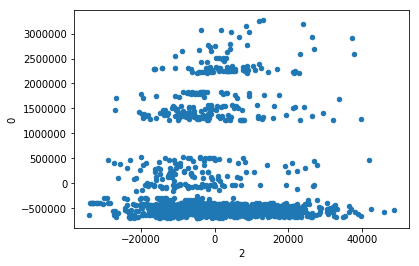

In [87]:
T3.plot.scatter(x = T3.columns[2],y = T3.columns[0])

In [83]:
T3

,0,1,2
0,1.706391e+06,-179900.335948,-19397.863278
1,-6.934697e+05,-69549.568853,-805.510761
2,-6.942771e+05,-69234.402666,-12003.685850
3,-6.926962e+05,-69036.663883,-9789.315067
4,-6.922573e+05,-68947.908479,-15127.958837
5,-6.917180e+05,-68785.982355,-21726.164557
6,-6.916646e+05,-68828.867033,-12945.193476
7,-6.912302e+05,-68757.981539,-4663.466440
8,1.499268e+06,-169252.163314,-6867.592738
9,-6.910150e+05,-68624.142437,1207.569109


In [33]:
print(kmeans.labels_)
print(clustering.labels_)

[3 0 0 ... 3 3 3]
[3 0 0 ... 3 3 3]


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(kmeans.labels_,clustering.labels_)

1.0